In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

In [14]:
cancer = pd.read_csv(r'C:\Users\ppawa\Pranav\Study\Engineering\SEM 5\ML\Lab\ML-Labs\BreastCancer.csv')
cancer['diagnosis'] = cancer['diagnosis'].map({'M': 1, 'B': 0})

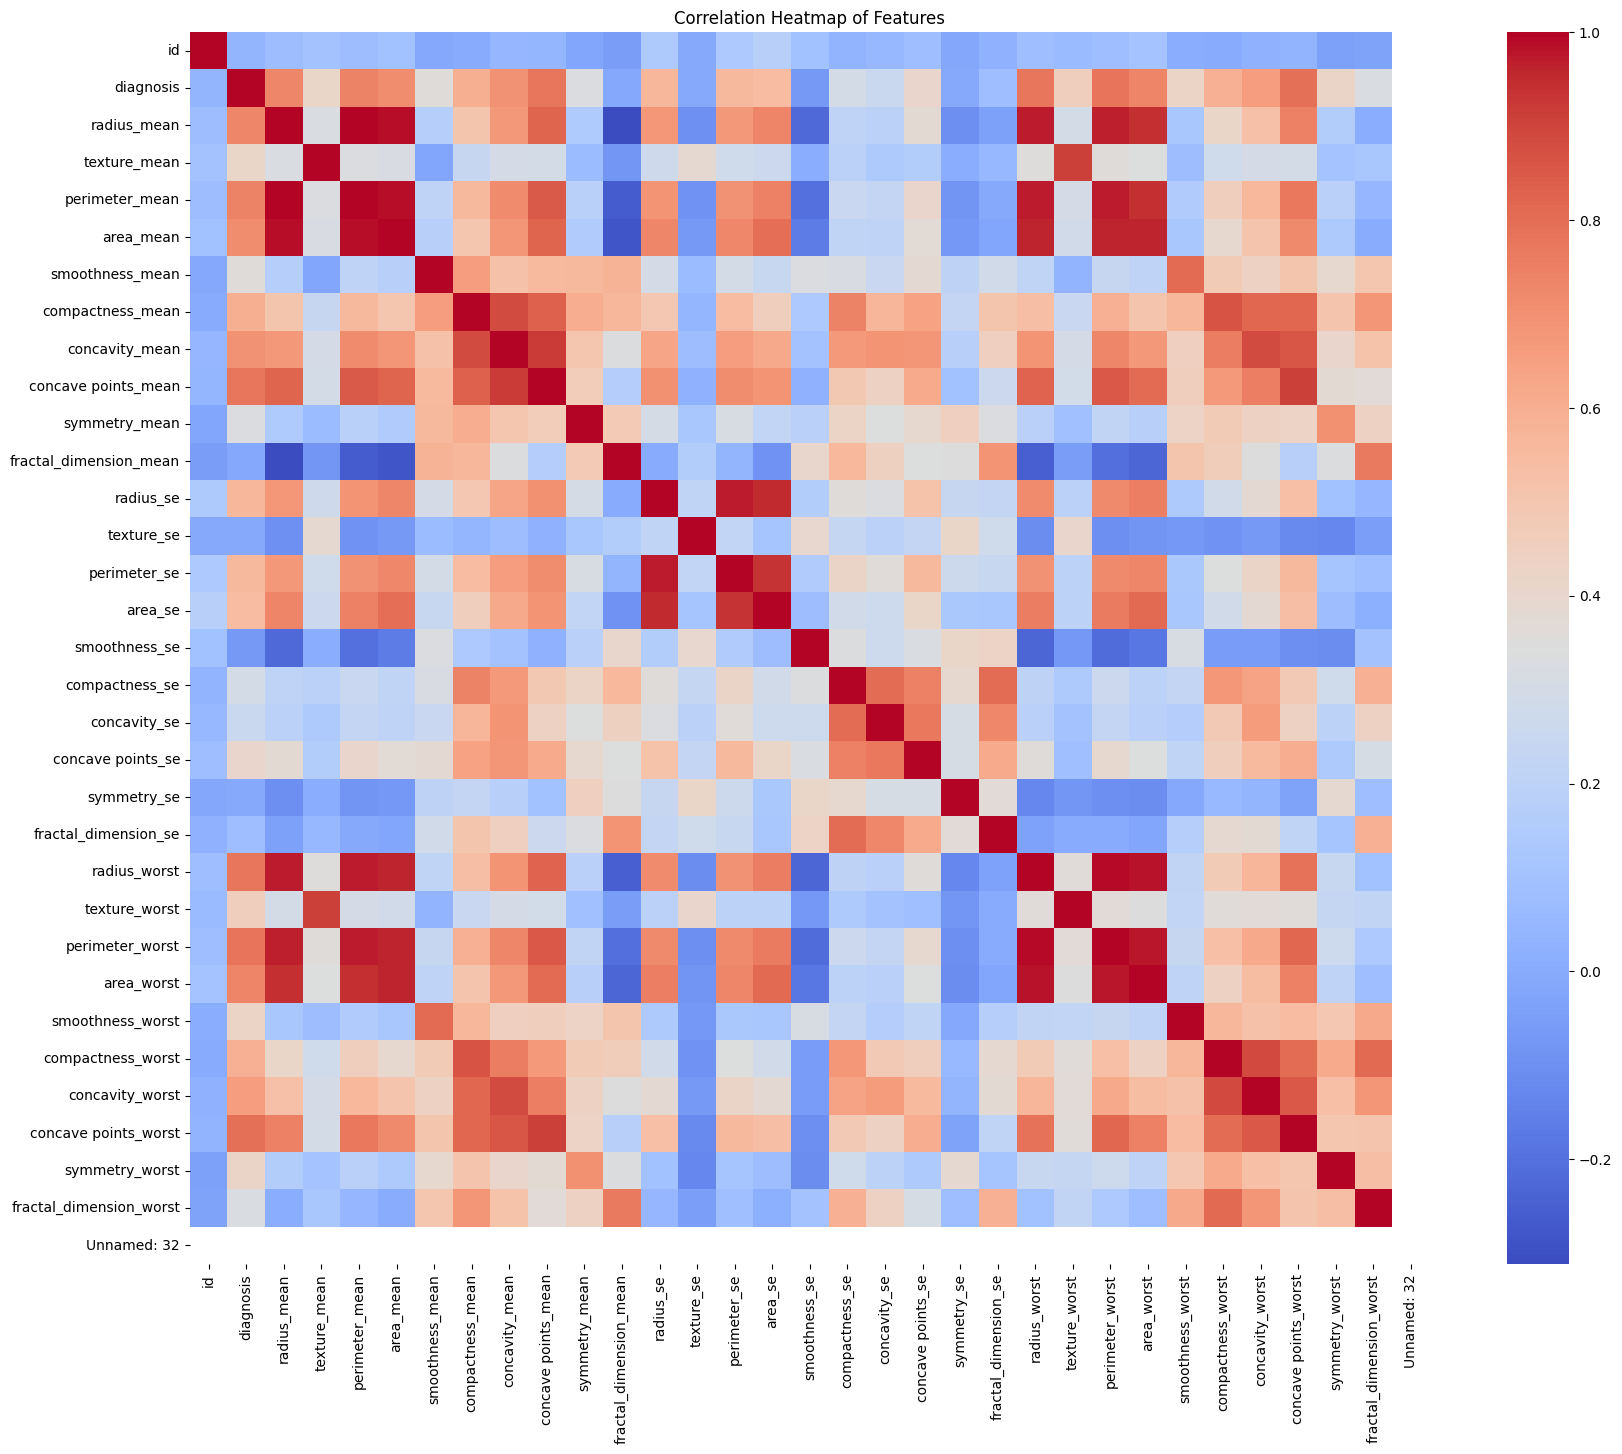

In [16]:
# Correlation Map
numeric_columns = cancer.select_dtypes(include=[np.number]).columns
cancer_numeric = cancer[numeric_columns]
plt.figure(figsize=(20, 16))
sns.heatmap(cancer_numeric.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

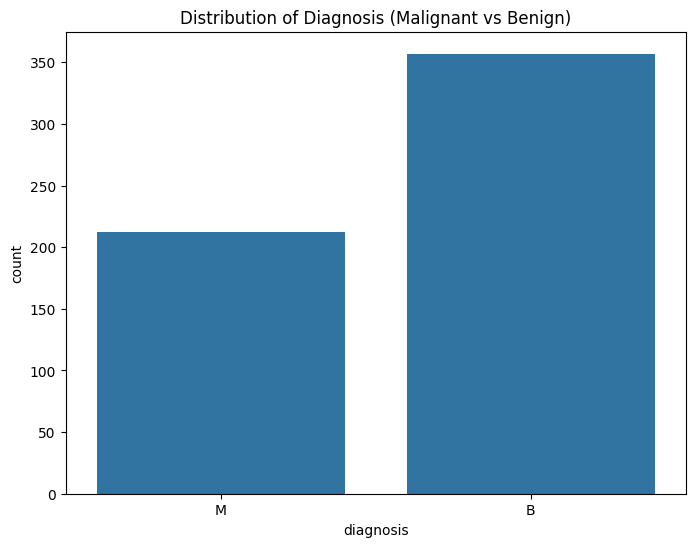

In [10]:
# Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=cancer)
plt.title('Distribution of Diagnosis (Malignant vs Benign)')
plt.show()

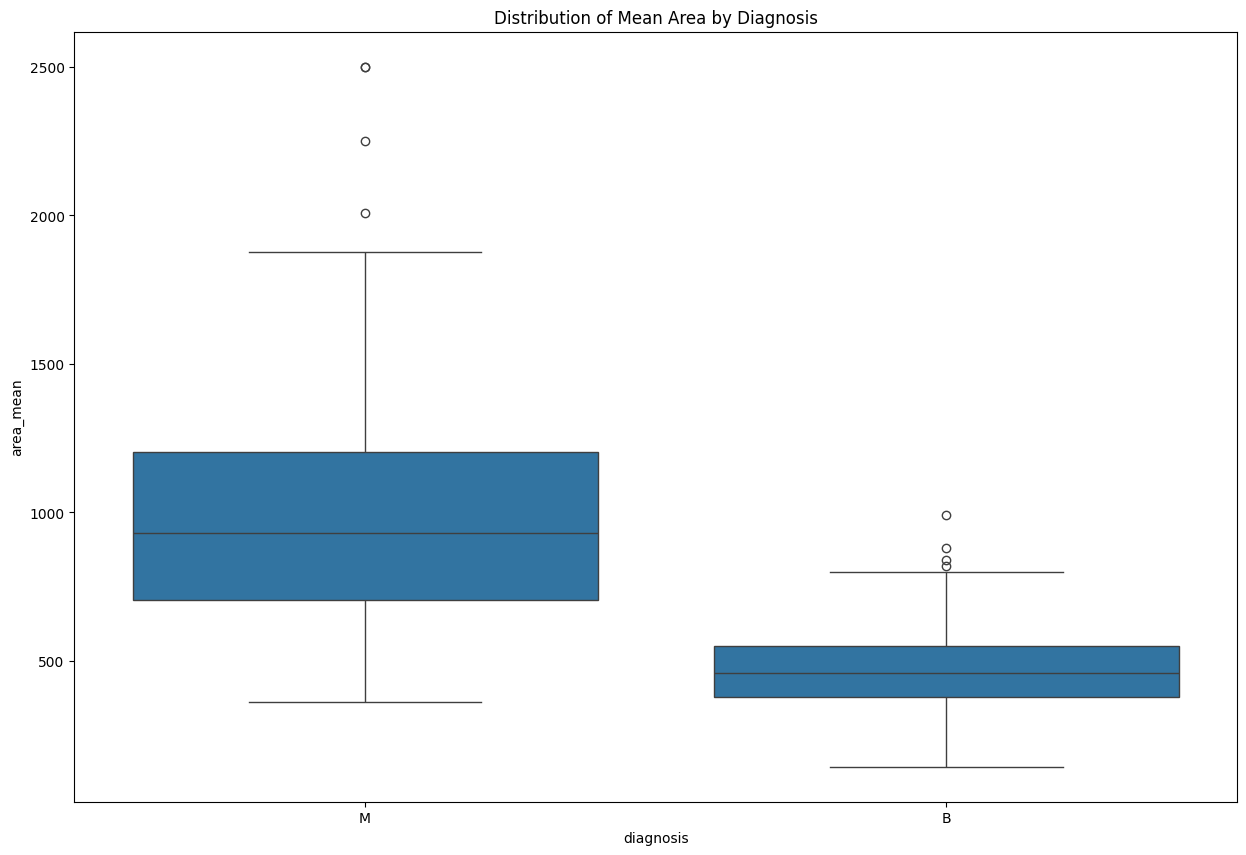

In [11]:
# Box Plot of Key Features
plt.figure(figsize=(15, 10))
sns.boxplot(x='diagnosis', y='area_mean', data=cancer)
plt.title('Distribution of Mean Area by Diagnosis')
plt.show()

In [17]:
X = cancer[['radius_mean']]
y = cancer['diagnosis']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

In [19]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        71
           1       1.00      0.81      0.90        43

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114



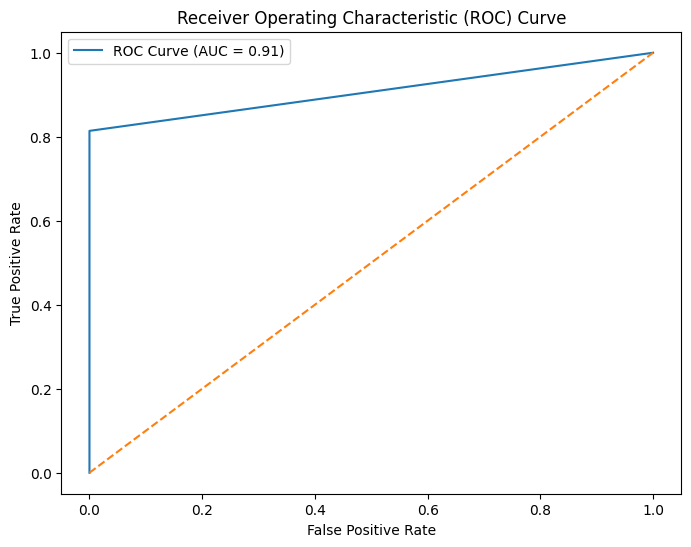

In [20]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, gnb_pred)
roc_auc = roc_auc_score(y_test, gnb_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

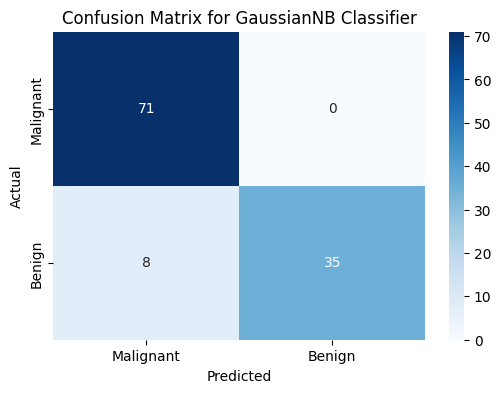

In [8]:
cm = confusion_matrix(y_test, gnb_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix for GaussianNB Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

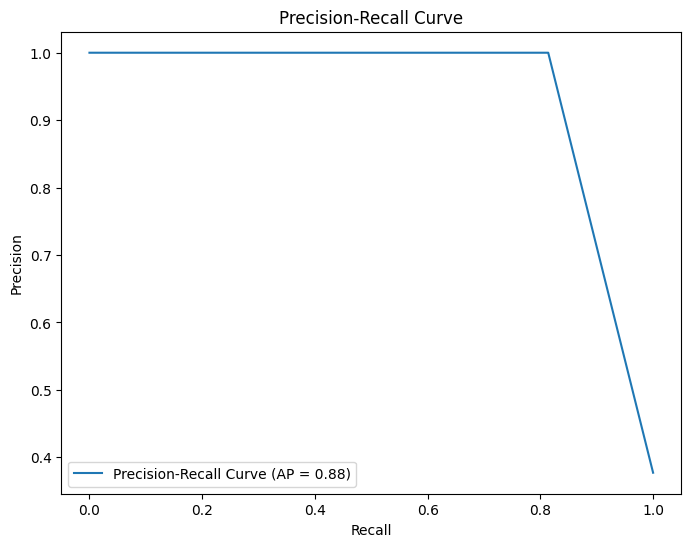

In [21]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, gnb_pred)
average_precision = average_precision_score(y_test, gnb_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()